# Sannolikhetslära och statistik 1ma915

Tänken med denna arbetsbok är att den ska läsas och exekverars sekventiellt. När en cell och tillhörande kodblock har lästs så exekveras denna (shift+enter), för att variablerna ska tilldelas korrekt värden eftersom de kan komma att användas i senare kodblock.

Vissa kodblock ska endast exekveras för att tilldela värden till variabler, rita upp figurer eller importera bibliotek. Andra kodblock är kräver att du som student ska föra in information eller komplettera koden för att det ska fungera. Dessa är då utmärkta med ett antal asterisker där kod förväntas fyllas i.


Vi börjar med att importera de Python-biblotek som vi kommer att behöva för laborationen.
* numpy (hantering av vektorer och matriser)
* scipy (vetenskapliga beräkningar)
* seaborn (visualisering av data)
* matplotlib (visualisering)
* pandas (datahantering)

In [2]:
import numpy as np
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## Numpy

Vi kommer att börja titta på det första paketet _numpy_. Detta är ett paket som hjälper oss att hantera mångdimensionella arrayer, t.ex. matriser och vektorer.

Numpy-objekt kan enkelt skapas upp med kommandot np.array, t.ex.
```
A = np.array([[1, 2, 3], [1, 1, -1]])
```
Vi kan kontrollera storleken av en sådan array m.h.a kommandot np.shape. I fallet ovan förväntar vi oss en shape (2, 3).

In [3]:
A = np.array([[1, 2, 3], [1, 1, -1]])
np.shape(A)

(2, 3)

Vi skapar upp två nya vektorer
````
x = np.array([3, 2, 1])
y = np.array([1, 0, 1])
````

In [4]:
x = np.array([3, 2, 1])
y = np.array([1, 0, 1])

# Vi skriver ut vektorerna
print('x = ' + str(x))
print('y = ' + str(y))

x = [3 2 1]
y = [1 0 1]


Vi kan utföra vanlig vektoraritmetik på dessa, men även specifika kommandon såsom punktprodukt (`np.vdot`)

In [5]:
x + y

array([4, 2, 2])

In [6]:
x - 2*y

array([ 1,  2, -1])

In [7]:
np.dot(x, y)

4

Vi kan även utföra matrismultiplikation med kommandot `np.matmul`.

In [8]:
np.matmul(A, x)

array([10,  4])

Och i fallet med kvadratiska matriser kan vi upprepa `matmul` med `linalg.matrix_power`

In [9]:
B = np.array([[2, 3], [1, 1]])
print(np.linalg.matrix_power(B, 2)) # samma som nedanstående
print(np.matmul(B,B))

[[7 9]
 [3 4]]
[[7 9]
 [3 4]]


Indexeringen startar med index 0, och vill vi ha ett specifikt element i en numpy-array görs detta med följande kommando

In [10]:
# Detta ger elementet i den första raden och tredje kolumnen
A[0, 2]

3

In [11]:
# Detta ger alla element i den andra raden
A[1, :]

array([ 1,  1, -1])

In [12]:
# Detta ger alla element i den första kolumnen
A[:,0]

array([1, 1])

## Funktioner
Numpy erbjuder en mängd funktioner för olika beräkningar på vektorer. Nedan visas några sådana exempel.

In [13]:
# beräkna medelvärde
x = [4, 5, -1, 10, 0]
print(f'Medelvärdet för x är: {np.mean(x)}')

# beräkna standardavvikelse (:.2f) används för att avrunda till 2 decimaler
print(f'Standardavvikelsen för x är: {np.std(x):.2f}')

# bestäm största och minsta värdet
print(f'Största och minsta värdet i x är: {np.max(x)} och {np.min(x)}')

# beräkna summan av vektorna element
print(f'Summan av elementen i x är: {np.sum(x)}')

# elementvis potens
print(f'Elementvis kvadrat: {np.power(x, 2)}')

Medelvärdet för x är: 3.6
Standardavvikelsen för x är: 3.93
Största och minsta värdet i x är: 10 och -1
Summan av elementen i x är: 18
Elementvis kvadrat: [ 16  25   1 100   0]


## Speciella matriser
Vi kan konstruera en mängd speciella matriser och vektorer

In [14]:
np.ones((3,2)) # en ettmatris
np.zeros(2) # en nollmatris
np.eye(3) # enhetsmatris
np.random.random((2,1)) # matris där varje element är likformigt fördelat [0,1]         

array([[0.41849448],
       [0.29576314]])

# Övning

Konstruera en slumpmässig $10\times10$-matris $A$. Skapa en ny maris $B$ som är $A$ men omskalad så att dess största element är 1. Detta kan göras genom att dividera med dess största värde. Undersök sedan vad som händer största och minsta värde för $B^{4}$ (matrismultiplikation), och för $B.^{100}$ (elementvis multiplikation).

In [93]:
A = np.random.random((10,10))
B = A / np.max(A)
print(np.max(B))
print(np.min(B))
B4 = B
B4 = np.linalg.matrix_power(B, 4)
print(f'\nMax: {np.max(B4)}')
print(f'Min: {np.min(B4)}')
B100 = np.power(B, 100)
print(f'\nMax: {np.max(B100)}')
print(f'Min: {np.min(B100)}')


1.0
0.0010703610942910348

Max: 115.78869532309022
Min: 37.32165851341925

Max: 1.0
Min: 8.974938646743276e-298


# Matplotlib
Nu när vi bekantat oss lite med numpy kan vi använda detta för att rita grafer med Matplotlib. Specifikt är vi intresserade av submodulen `pyplot`.

Kommandot `plt.plot` ger oss möjligheter att skapa plottar. T.ex. kan det användas såhär:


Y = [-0.21135578 -0.01168813  0.45826577 -0.31261777  0.39730351  0.36865634
 -0.18871916 -0.47129446  0.45080256  0.17165314 -0.30889989  0.00595833
 -0.416318    0.20263892  0.00944243 -0.31797521 -0.41770434  0.14845744
 -0.17919624  0.38378423  0.12079892  0.05892241]


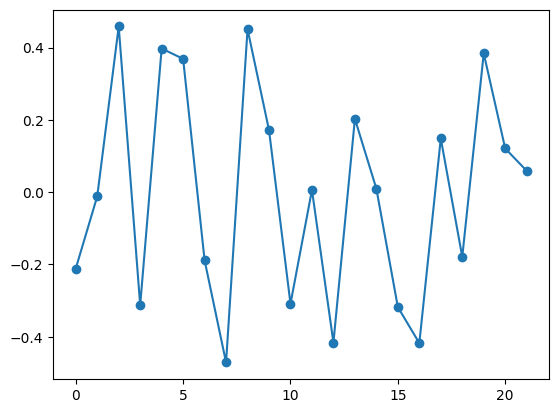

In [15]:
Y = np.random.random(22) - 0.5
print("Y =", Y)

plt.plot(Y, 'o-')

plt.show()

Rent generellt fungerar Matplotlib väldigt likt `plot` i MATLAB. Givet en vektor `t`, så kan vi plotta dess värden, eller en funktion av dessa värden.

t = [0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
 3.6 3.8 4.  4.2 4.4 4.6 4.8]


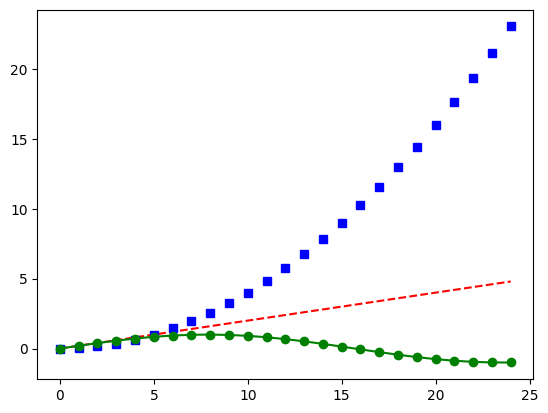

In [16]:
t = np.arange(0., 5., 0.2)
print("t =", t)

# red dashes, blue squares, and green circles with lines
plt.plot(t, 'r--')
plt.plot(t ** 2, 'bs')
plt.plot(np.sin(t), 'go-')

plt.show()

Vi kan enkelt lägga till mer information, i vår plot. T.ex. 

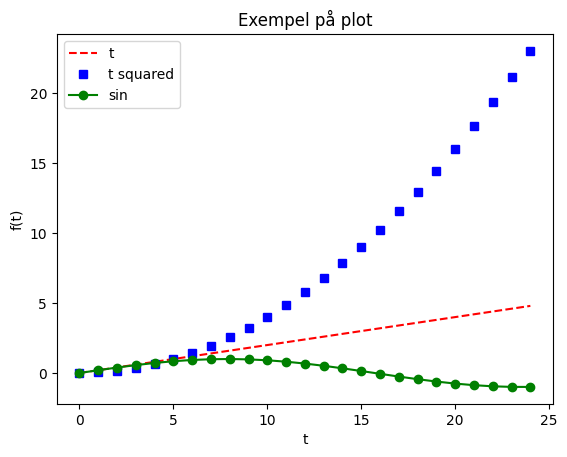

In [17]:
# För funktionen plot finns ett label-argument
plt.plot(t, 'r--', label='t')
plt.plot(t**2, 'bs', label='t squared')
plt.plot(np.sin(t), 'go-', label='sin')

plt.legend() # ger oss en legend över alla våra plottar
plt.title("Exempel på plot")
plt.xlabel("t")
plt.ylabel("f(t)")

plt.show()

Antag vidare att vi vill göra ett spridningsdiagram av vår vektor. Ett alternativ är att använda `plt.plot(t, '.')`, men för att

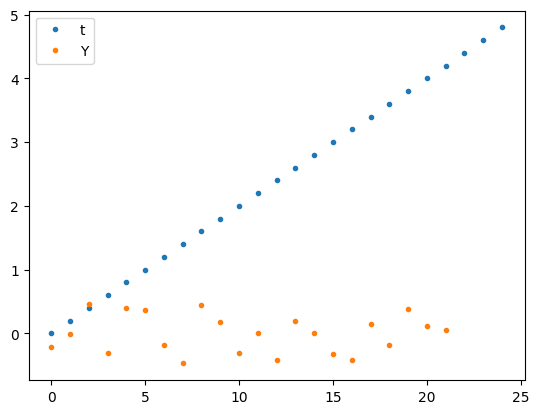

In [18]:
plt.plot(t, '.', label='t')
plt.plot(Y, '.', label='Y') # samma Y som tidigare

plt.legend()
plt.show()

Subplots är ett verktyg för att dela in figurerna i flera delfigurer. Det kan användas på följande sätt.

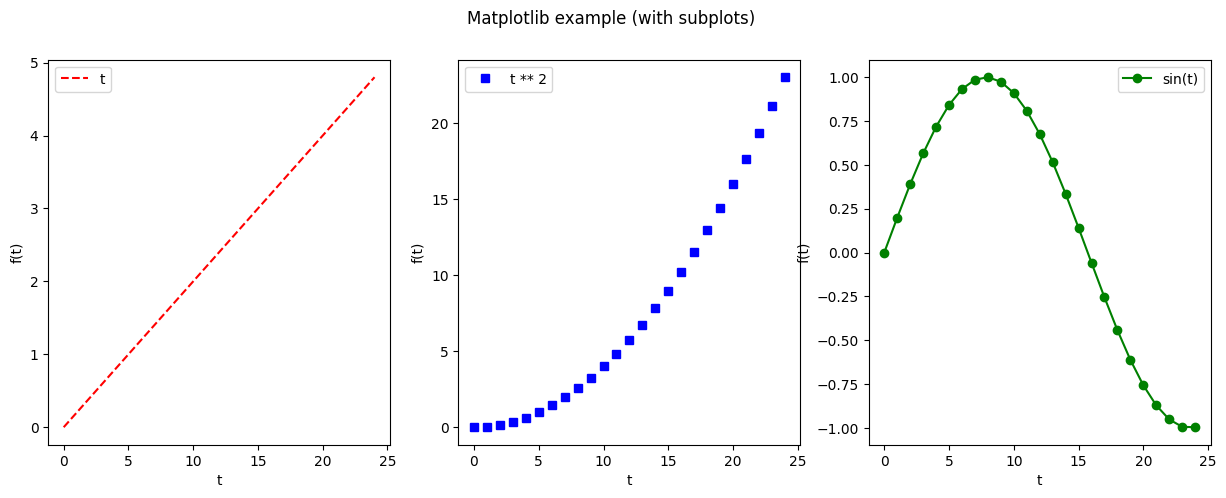

In [19]:
# notera att t definierades i föregående cell

plt.figure(figsize=(15,5))
plt.suptitle("Matplotlib example (with subplots)")

# Notice the "label" arguments added to each plot
plt.subplot(131)
plt.plot(t, 'r--', label='t')
plt.legend()
plt.xlabel("t")
plt.ylabel("f(t)")

plt.subplot(132)
plt.plot(t**2, 'bs', label='t ** 2')
plt.legend()
plt.xlabel("t")
plt.ylabel("f(t)")

plt.subplot(133)
plt.plot(np.sin(t), 'go-', label='sin(t)')
plt.legend()
plt.xlabel("t")
plt.ylabel("f(t)")

plt.show()

I ovanstående exempel har Matplotlib själv valt våra $x$-värden, men vi kan såklart skicka in både $x$ och $y$ i en plot.

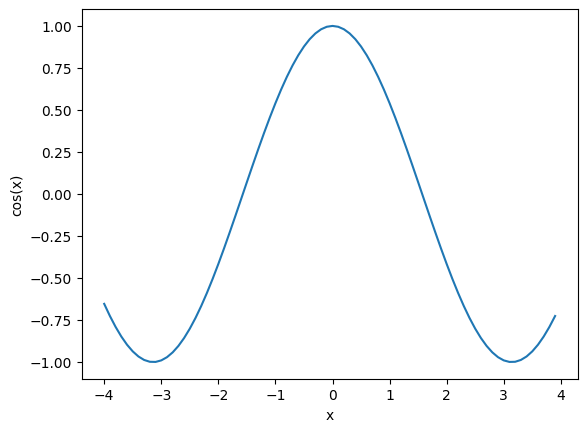

In [20]:
x = np.arange(-4., 4., 0.1)
y = np.cos(x)
plt.xlabel("x")
plt.ylabel("cos(x)")
plt.plot(x, y)
plt.show()

# Övning

1. Skriv kod för att plotta funktionen $f(x) = \exp(x)$ i intervallet $[-3,3]$. Den ska vara grön-streckad.
2. Lägg sedan till i din plot logaritmen av $x$. Denna ska vara plottad med röda punkter. Tänk på att den ska vara definerad i intervallet för att plotta ska fungera utan fel.
3. Lägg till labels för dina plottar och en legend.

<function matplotlib.pyplot.show(close=None, block=None)>

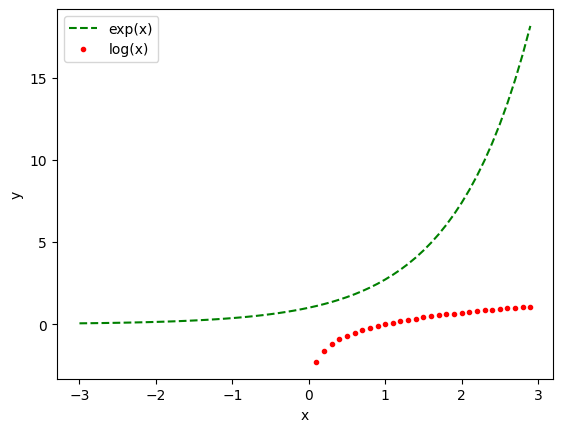

In [94]:
x = np.arange(-3., 3., 0.1)
y = np.exp(x)
x2 = np.arange(0.1, 3., 0.1)
y2 = np.log(x2)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y,'g--', label='exp(x)')
plt.plot(x2, y2, 'r.', label = 'log(x)')
plt.legend()
plt.show

# Pandas och Seaborn
Nu när vi bekantat oss lite med numpy och Matplotlib, så kommer vi till Pandas. Pandas är ett paket för datamanipulering och datastrukturer. Data sparas i så kallade dataframes. Dessa kan konstrueras som följer, t.ex. från en numpy-array, eller en dict.

Vanligen importeras Pandas som `import pandas as pd` och Seaborn som `import seaborn as sns`.

In [21]:
# Dataframe från numpy
d = np.array([[1, 3], [2, 4], [5, 8]])
df = pd.DataFrame(data=d)
df

,0,1
0,1,3
1,2,4
2,5,8


In [22]:
# DataFrame från dict
d = {'col1': [1, 2, 5], 'col2': [3, 4, 8]}
df = pd.DataFrame(data=d)
df

,col1,col2
0,1,3
1,2,4
2,5,8


En av Pandas många förtjänster är att det fungerar ypperligt som input till Seaborn som är ett verktyg för statistik data visualisering.

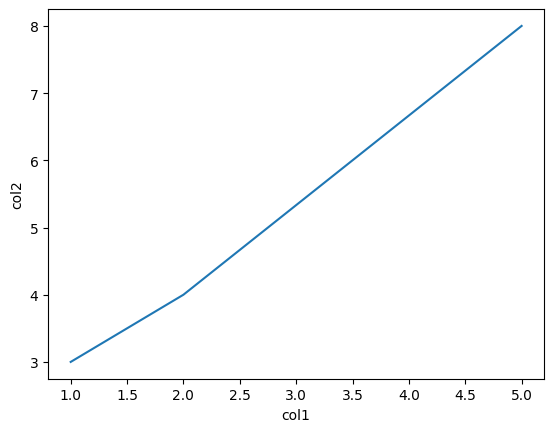

In [23]:
sns.lineplot(data=df, x="col1", y="col2") # hämtar data från Pandas dataframe df
plt.show()

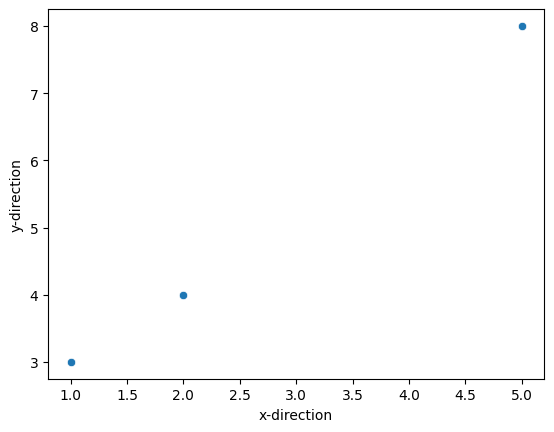

In [24]:
pl = sns.scatterplot(data=df, x="col1", y="col2")
pl.set_xlabel("x-direction")
pl.set_ylabel("y-direction")
plt.show()

Vi kan även skapa histogram med hjälp av kommandot `histplot`. För att demonstrera dras 100 slumpmässiga värden från en standard normalfördelning.

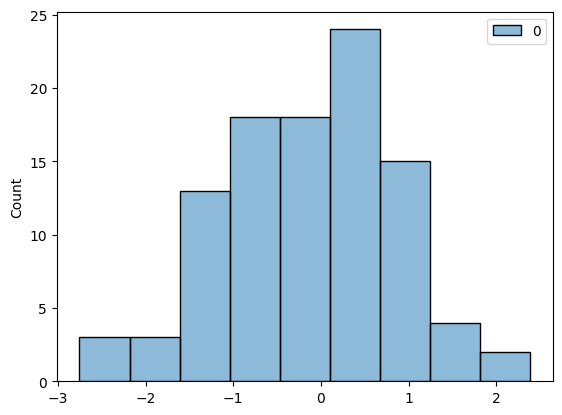

In [25]:
drnd = np.random.randn(100, 1)
sns.histplot(data=drnd)
plt.show()

Genom att skicka in data med flera kolumner så kan vi enkelt ett histogram för varje kolumn. Vidare kan vi återanvända det vi kan från Matplotlib för att förfina våra plottar.

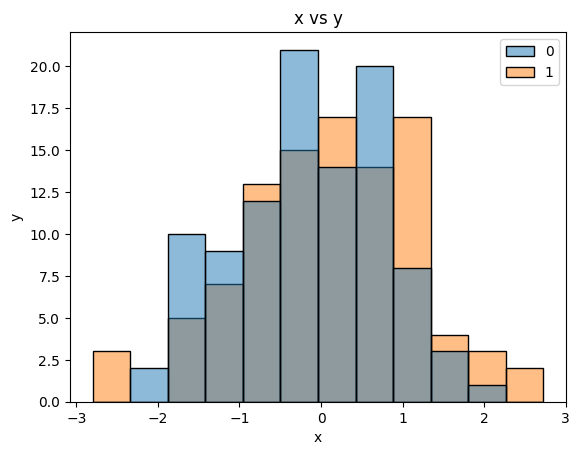

In [59]:
rndnorm = np.random.randn(100, 2)
sns.histplot(data=rndnorm)
plt.xlabel("x")
plt.ylabel("y")
plt.title("x vs y")
plt.show()

# Övning

1. Slumpa $100$ tal i från en standardnormalfördelning med hjälp av numpy (`np.random.randn`). Studera sedan histogrammet. Använd 10 bins.
2. Inkludera också i din plot en plot av funktionen $f(x) = \frac{1}{\sqrt{2\pi}}\exp(-\frac{x^2}{2})$.
3. Ändra stat i ditt histogram till `stat = 'density'`. Vad händer med bilden?


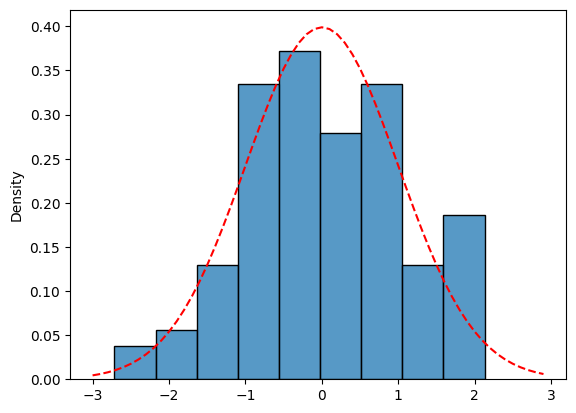

In [70]:
d = np.random.randn(100)
x = np.arange(-3., 3., 0.1)
sns.histplot(data=d, stat = 'density')
y = (1/np.sqrt(2*np.pi))*np.exp(-pow(x, 2)/2)
plt.plot(x, y, 'r--')
plt.show()

# Forsättning histogram
Genom att använda argumentet `stat` kan vi förändra skalningen på histogrammet.

 - `count`: visa antalet observationer i varje bin
 - `frequency`: visa antalet observationer delat med stapelns bredd (bredd på varje bin)
 - `probability` or proportion: normalisera så staplarnas höjd summerar till 1
 - `percent`: normalisera så staplarnas höjd summerar till 1
 - `density`: normalisera så diagrammet har area 1
 

Argumentet `bins` ger oss hur många staplar vi vill att histogrammet ska inneha.

<Axes: ylabel='Count'>

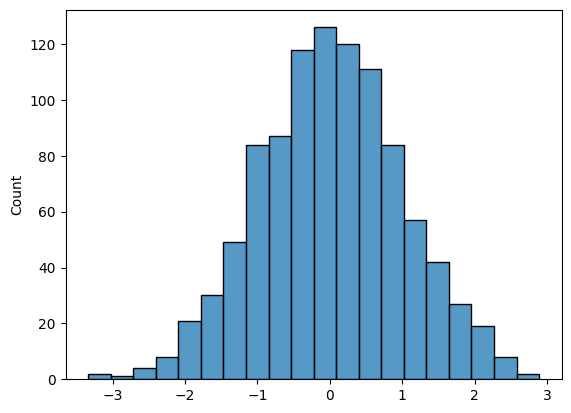

In [71]:
x = np.random.randn(1000)
sns.histplot(x, stat = 'count', bins=20)

Vi kan enkelt kombinera flera olika plottar i samma bild genom att lista dessa på rad.

<Axes: ylabel='Density'>

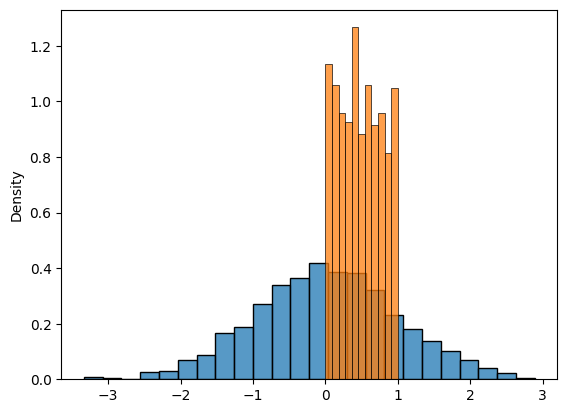

In [72]:
sns.histplot(x, stat = 'density')
y = np.random.random(1000)
sns.histplot(y, stat = 'density')

Genom att lägga samma all data i en DataFrame kan vi plotta båda fördelningarna på en gång.

<Axes: ylabel='Count'>

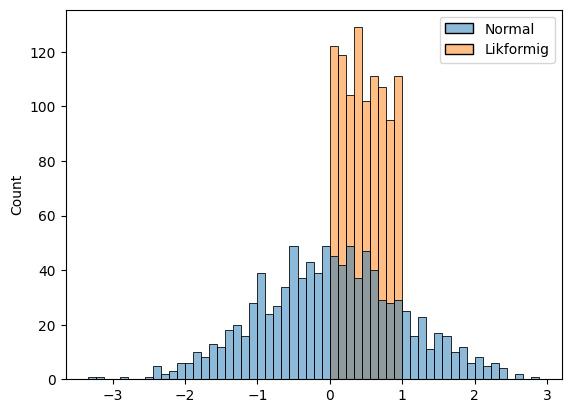

In [73]:
df = pd.DataFrame(np.transpose([x, y]))
df.columns = ['Normal', 'Likformig']
sns.histplot(data = df)

# Övning

Ladda in datamängden `iris` med kommandot `iris = sns.load_dataset('iris')`. Datan består av fyra kolumner av olika mätvärden. Plotta fördelningen av alla dessa med hjälp av ett histogram.

Gör också en figur bestående av fyra separata plottar med en fördelning i varje. Alla fördelningarna ska ha olika färger (argumentet `color` kan vara behjälpligt här). Slutligen ska alla fyra plottar ha samma $y$-range $[0, 50]$. Här kan du t.ex. använda `plt.ylim( ditt intervall )`

<Axes: ylabel='Count'>

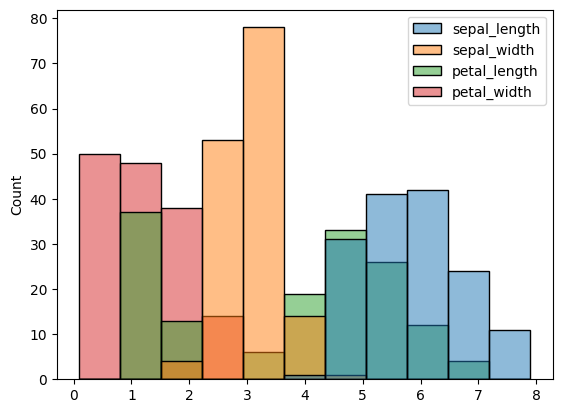

In [75]:
iris = sns.load_dataset('iris')
sns.histplot(data=iris)

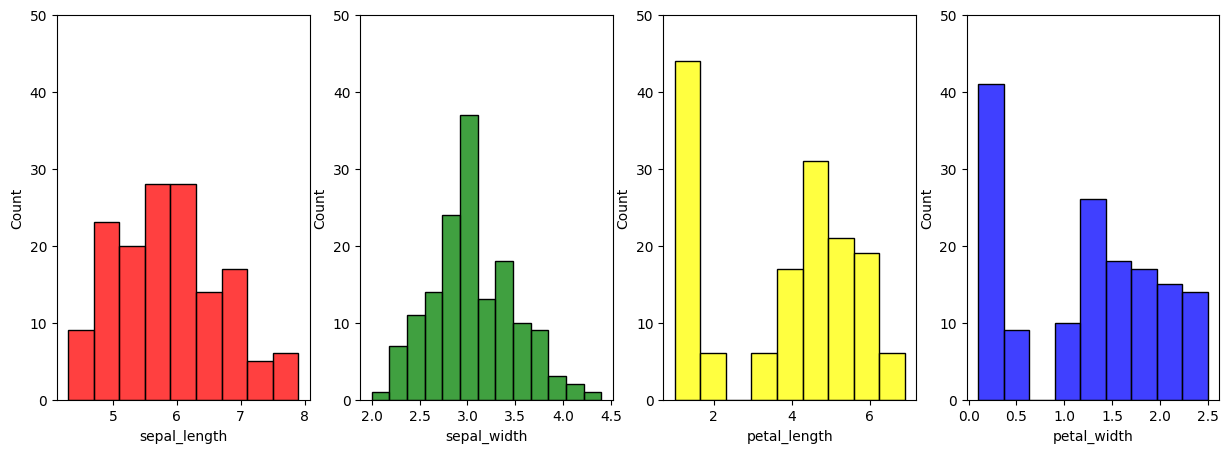

In [91]:
plt.figure(figsize=(15, 5))


plt.subplot(141)
plt.ylim(0, 50)
sns.histplot(data=iris['sepal_length'], color='red')


plt.subplot(142)
plt.ylim(0, 50)
sns.histplot(data=iris['sepal_width'],color='green')


plt.subplot(143)
plt.ylim(0, 50)
sns.histplot(data=iris['petal_length'],color='yellow')

plt.subplot(144)
plt.ylim(0, 50)
sns.histplot(data=iris['petal_width'],color='blue')

plt.show()